### KNN
- used for regression and classification task.
- mostly used for classification purpose.

#### **all thoery part in slide**

In [1]:
from IPython.display import Image

In [7]:
import pandas as pd

In [8]:
ds = pd.read_csv("Social_Network_Ads.csv")
ds

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [9]:
ds.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

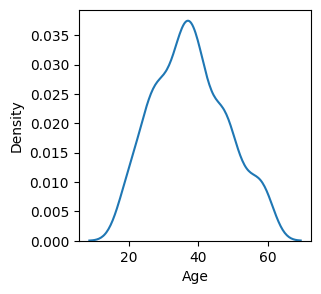

In [15]:
plt.figure(figsize=(3,3))
sns.kdeplot(ds["Age"])
plt.show()


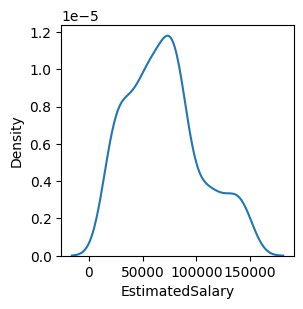

In [16]:
plt.figure(figsize=(3,3))
sns.kdeplot(ds["EstimatedSalary"])
plt.show()

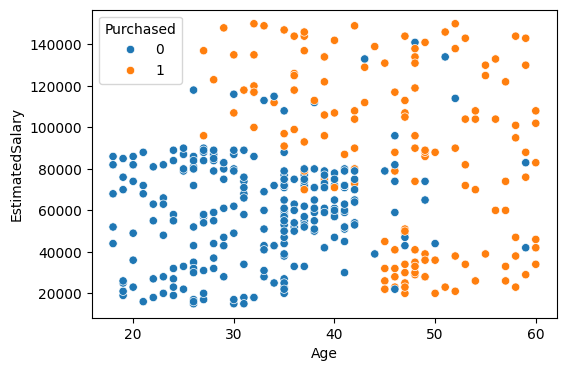

In [19]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=ds["Age"], y=ds["EstimatedSalary"], hue=ds["Purchased"])
plt.show()

In [25]:
x = ds.iloc[:,:-1]
y = ds["Purchased"]

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
ss = StandardScaler()

In [ ]:
ss.fit(x)
x = pd.DataFrame(ss.transform(x), columns=x.columns)

In [28]:
x

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [29]:
from sklearn.model_selection import train_test_split

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2, random_state=50)

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knnc = KNeighborsClassifier(n_neighbors=5)

In [37]:
knnc.fit(x_train, y_train)

KNeighborsClassifier()

In [38]:
knnc.score(x_test, y_test)*100

92.5

In [42]:
knnc.score(x_train, y_train)*100

90.9375

Jab bhi testing ka score as compared to training se ziyada ho to smjh jae k hmara model achy se train nahi hwa

In [58]:
for i in  range(1,30):
    knnc1 = KNeighborsClassifier(n_neighbors=i)
    knnc1.fit(x_train, y_train)
    print(f"training score: {knnc1.score(x_train, y_train)*100}        \t testing score: {knnc1.score(x_test, y_test)*100} \t i: {i}")


training score: 99.375        	 testing score: 90.0 	 i: 1
training score: 93.125        	 testing score: 85.0 	 i: 2
training score: 93.4375        	 testing score: 92.5 	 i: 3
training score: 92.5        	 testing score: 90.0 	 i: 4
training score: 91.875        	 testing score: 91.25 	 i: 5
training score: 90.625        	 testing score: 91.25 	 i: 6
training score: 92.1875        	 testing score: 92.5 	 i: 7
training score: 91.5625        	 testing score: 92.5 	 i: 8
training score: 91.875        	 testing score: 93.75 	 i: 9
training score: 90.9375        	 testing score: 92.5 	 i: 10
training score: 91.25        	 testing score: 93.75 	 i: 11
training score: 90.3125        	 testing score: 93.75 	 i: 12
training score: 91.25        	 testing score: 93.75 	 i: 13
training score: 90.9375        	 testing score: 93.75 	 i: 14
training score: 90.9375        	 testing score: 93.75 	 i: 15
training score: 90.0        	 testing score: 93.75 	 i: 16
training score: 90.3125        	 testin

In [59]:
knnc1 = KNeighborsClassifier(n_neighbors=3)
knnc1.fit(x_train, y_train)
print(f"training score: {knnc1.score(x_train, y_train)*100} \ntesting score: {knnc1.score(x_test, y_test)*100} ")


training score: 93.4375 
testing score: 92.5 


In [ ]:
knnc1.predict([[-1.781797	,-1.490046]]) 

C:\Users\IC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

In [62]:
knnc1.predict([[0.797057,-0.844019]])

C:\Users\IC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

In [63]:
from mlxtend.plotting import plot_decision_regions

C:\Users\IC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<Axes: >

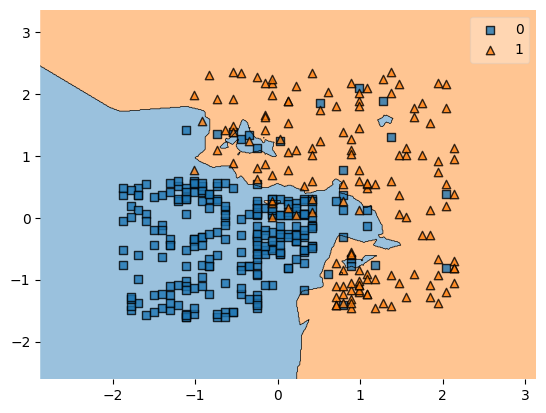

In [64]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=knnc1)